# Dataverse - Bean and Brew - Sustainable Strategy

In [1]:
library(tidyverse)
#library(tidymodels)
#library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)
#source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
items <- read_csv("items.csv")
items

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 17 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): item_name, item_type, drink_temperature, drink_type
dbl (2): price, production_cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


item_name,price,production_cost,item_type,drink_temperature,drink_type
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Espresso,3.0,0.8,Drink,Hot,Coffee
Americano,3.5,1.0,Drink,Hot,Coffee
Latte,4.5,1.2,Drink,Hot,Coffee
⋮,⋮,⋮,⋮,⋮,⋮
Reusable Coffee Cup,15,6,Merchandise,N/A,NA
Tote Bag,12,4,Merchandise,N/A,NA
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA


In [3]:
sales <- read_csv("sales.csv")
sales

Rows: 32605 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): item_name, transaction_type, own_cup
dbl  (1): customer_id
lgl  (1): surcharge
date (1): date
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,time,item_name,transaction_type,own_cup,surcharge,customer_id
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2024-12-31,14:36:31,Chai Latte,Dine-in,True,FALSE,15227
2024-12-31,14:57:19,Cappuccino,Takeout,True,FALSE,21314
2024-12-31,15:30:12,Espresso,Dine-in,False,FALSE,11063


In [4]:
coffee <- inner_join(items,sales)
coffee

Joining with `by = join_by(item_name)`


item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<lgl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,False,FALSE,18500
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,True,FALSE,11609
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,False,FALSE,10437
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-24,07:25:20,Dine-in,N/A,FALSE,16702
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-26,13:02:19,Takeout,N/A,FALSE,12418
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-29,13:38:39,Dine-in,N/A,FALSE,29715


In [5]:
merch <- filter(coffee, item_type == "Merchandise")
merch

item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<lgl>,<dbl>
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-11,07:19:12,Takeout,N/A,FALSE,24356
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-12,09:52:37,Takeout,N/A,FALSE,14571
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-13,07:11:59,Dine-in,N/A,FALSE,24899
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-24,07:25:20,Dine-in,N/A,FALSE,16702
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-26,13:02:19,Takeout,N/A,FALSE,12418
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-29,13:38:39,Dine-in,N/A,FALSE,29715


In [6]:
coffee_only <- coffee |> 
  filter(item_type != "Merchandise") |>
  mutate(
    drink_temperature = as_factor(drink_temperature),
    drink_type        = as_factor(drink_type),
    transaction_type  = as_factor(transaction_type),
    own_cup           = as.logical(own_cup)
  )
coffee_only

item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<date>,<time>,<fct>,<lgl>,<lgl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,FALSE,FALSE,18500
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,TRUE,FALSE,11609
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,FALSE,FALSE,10437
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-29,11:37:28,Dine-in,FALSE,FALSE,25413
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-30,07:47:35,Takeout,TRUE,FALSE,11586
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-31,13:15:02,Takeout,TRUE,FALSE,11609


In [7]:
coffee_drink_temperature <- coffee_only|> 
  group_by(drink_temperature) |> 
  summarise(brought_cup = sum(own_cup == TRUE),not_brought_cups = sum(own_cup == FALSE ),proportion = mean(own_cup == TRUE), proportion_not_own_cup = mean(own_cup == FALSE))
coffee_drink_temperature

drink_temperature,brought_cup,not_brought_cups,proportion,proportion_not_own_cup
<fct>,<int>,<int>,<dbl>,<dbl>
Hot,10509,10109,0.5097003,0.4902997
Cold,2758,7085,0.2801991,0.7198009


##### Explanation of how drink_temperature could affect reusability of cups
The data suggests that hot drinks are much more likely to be ordered using a reusable cup than cold drinks. The proportion of customers bringing their own cup for hot beverages is around 51%, whereas for cold beverages it drops to about 28%. This pattern can be interpreted in several realistic ways:
###### Practicality and Habit
- Customers tend to associate reusable cups (e.g., travel mugs, thermoses) with hot drinks like coffee or tea. Many people already own insulated hot drink tumblers and routinely carry them, especially commuters. Therefore, they naturally use them when purchasing hot drinks.
- Cold beverages, however, are more often consumed on the go without preplanning, meaning customers are less likely to bring a cup specifically for a cold drink.
###### Type of Container Used
- Reusable hot drink mugs are widely available, standardized, and easy for shops to fill.
- Reusable containers for cold drinks (e.g., clear tumblers for iced drinks) are less commonly owned, and many customers may not think of bringing one.
- Some coffee shops also have stricter guidelines for filling customer-provided containers for iced/blended drinks, reducing incentive.
###### Seasonal/Comfort Motivation
- Hot drinks are often purchased during colder weather, when customers already carry bags, backpacks, or jackets—making it easy to carry a reusable cup.
- Cold drinks are often spontaneous purchases in warm weather (e.g., “I’m hot, I’ll grab an iced coffee”), so people may not have brought a reusable container with them.

###### Conclusion
Overall, the data indicates that hot drink customers engage in sustainable behavior more consistently, likely due to established habits, availability of suitable reusable containers, and the practical advantages of insulated travel mugs. Cold drink consumers show much lower reusability, suggesting that encouraging reusable cold drink tumblers (or offering incentives) could significantly reduce waste in that category.

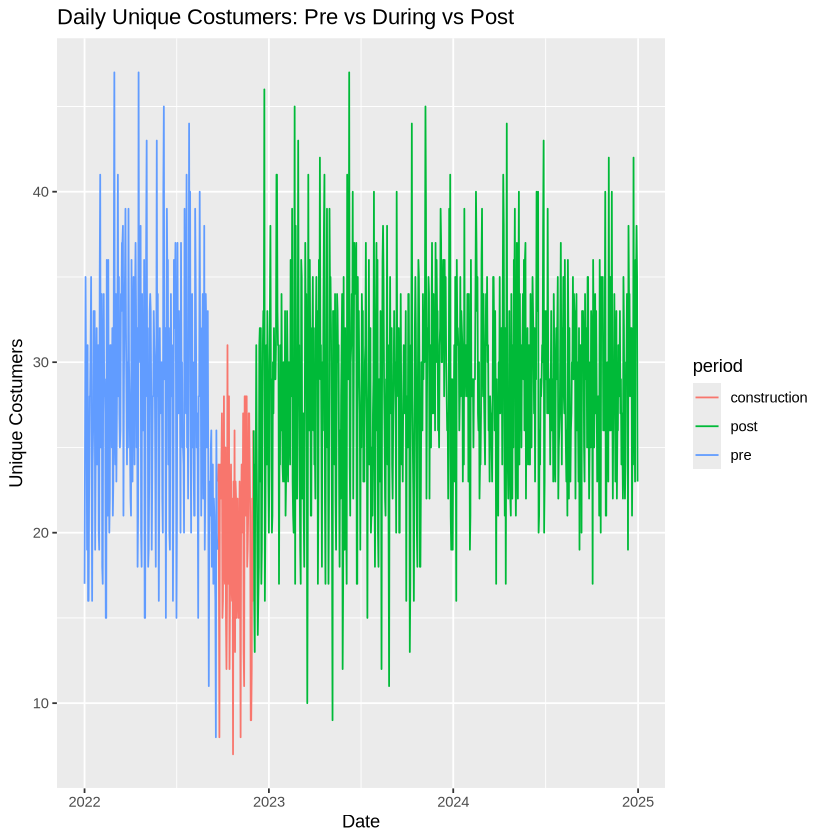

In [8]:
construction <- coffee |>
mutate(
    date=ymd(date),
    period=case_when(
           date<ymd("2022-09-22")~"pre",
           date>=ymd("2022-09-22")&date<=ymd("2022-12-01")~"construction",
           TRUE~"post"))

daily_customers <- construction |>
group_by(date, period) |>
summarise(unique_customers=n_distinct(customer_id), .groups="drop")

avg_customers <- daily_customers |>
group_by(period) |>
summarise(avg_daily_customer=mean(unique_customers))

ggplot(daily_customers, aes(date, unique_customers, color=period))+
geom_line()+
labs(title="Daily Unique Costumers: Pre vs During vs Post",
    x="Date",
    y="Unique Costumers")

The construction had no long-term negative effect on customer traffic, only short-term disruption.

In [9]:
coffee_trans_type <- coffee_only|> 
  group_by(transaction_type) |> 
  summarize(brought_cup = sum(own_cup == TRUE))
coffee_trans_type

transaction_type,brought_cup
<fct>,<int>
Takeout,8973
Dine-in,4294


Transaction type also affects reusable cup behaviour. Takeout customers are much more likely to bring their own cups compared to dine-in customers, likely because people getting beverages to-go already carry travel mugs as part of their routine. In contrast, dine-in customers typically expect the café to provide a cup, so they have less reason to bring their own.

In [10]:
coffee_drink_type <- coffee_only|> 
  group_by(drink_type,drink_temperature) |> 
  summarise(brought_cup = sum(own_cup == TRUE),not_brought_cups = sum(own_cup == FALSE ),proportion = mean(own_cup == TRUE))
coffee_drink_type

`summarise()` has grouped output by 'drink_type'. You can override using the
`.groups` argument.


drink_type,drink_temperature,brought_cup,not_brought_cups,proportion
<fct>,<fct>,<int>,<int>,<dbl>
Coffee,Hot,6068,5985,0.5034431
Coffee,Cold,1846,4718,0.2812310
Tea,Hot,3536,3255,0.5206891
Tea,Cold,912,2367,0.2781336
Other,Hot,905,869,0.5101466


In [11]:
# explore how morning/affternoon coffee customers respond to policy differently
coffee_only_time_h <- as.numeric(coffee_only$time)/3600
coffee_only <- coffee_only |>
  mutate(time = coffee_only_time_h)
noon <- as.difftime("12:00:00", format="%H:%M:%S")|>
  as.numeric(units = "hours")
coffee_only_morning <- coffee_only|>
  filter(time < noon)
coffee_only_afternoon <- coffee_only |>
  filter(time >= noon)

In [12]:
coffee_before_policy_afternoon <- coffee_only_afternoon |>
  filter(date < as.Date("2023-11-01"))|>
  group_by(transaction_type)|>
  summarize(prop_transaction_type = mean(own_cup))
coffee_after_policy_afternoon <- coffee_only_afternoon |>
  filter(date >= as.Date("2023-11-01"))|>
  group_by(transaction_type)|>
  summarize(prop_transaction_type = mean(own_cup))
coffee_before_policy_afternoon
coffee_after_policy_afternoon

transaction_type,prop_transaction_type
<fct>,<dbl>
Takeout,0.4018173
Dine-in,0.4057637


transaction_type,prop_transaction_type
<fct>,<dbl>
Takeout,0.5464178
Dine-in,0.4100000


In [13]:
# further check whether the rebrand is taking effect
# if the rebrand/decoration is effect, number of dine-in order should increase
coffee_before_policy_morning_dine <- coffee_only_morning |>
  filter(date < as.Date("2023-11-01"))
prop_dine_in_before_policy_morning <- coffee_before_policy_morning_dine |>
  summarise(prop = sum(transaction_type == "Dine-in") / n())|>
  pull()
coffee_after_policy_morning_dine <- coffee_only_morning |>
  filter(date >= as.Date("2023-11-01"))
prop_dine_in_after_policy_morning <- coffee_after_policy_morning_dine |>
  summarise(prop = sum(transaction_type == "Dine-in") / n())|>
  pull()
coffee_before_policy_afternoon_dine <- coffee_only_afternoon |>
  filter(date < as.Date("2023-11-01"))
prop_dine_in_before_policy_afternoon <- coffee_before_policy_afternoon_dine |>
  summarise(prop = sum(transaction_type == "Dine-in") / n())|>
  pull()
coffee_after_policy_afternoon_dine <- coffee_only_afternoon |>
  filter(date >= as.Date("2023-11-01"))
prop_dine_in_after_policy_afternoon <- coffee_after_policy_afternoon_dine |>
  summarise(prop = sum(transaction_type == "Dine-in") / n())|>
  pull()

prop_dine_in <- data.frame(
  Morning = c(prop_dine_in_before_policy_morning, prop_dine_in_after_policy_morning),
  Afternoon = c(prop_dine_in_before_policy_afternoon, prop_dine_in_after_policy_afternoon ),
  row.names = c("Before Rebrand", "After Rebrand")
)
prop_dine_in

,Morning,Afternoon
,<dbl>,<dbl>
Before Rebrand,0.3086793,0.3045463
After Rebrand,0.4084243,0.4051621


##### Explanation of how the policy change affects reusability of cups
The data shows that the rebrand and cup policy does improve the reusability of cups. The proportion of reusable cup usage increased both morning and afternoon after the policy introduced. For both morning and afternoon, the use of reusable cups increased significantly for takeout orders. The reusable cup usge changed only slightly for dine-in orders, however, the proportion of dine-in order increased. These findings suggest that:
  ##### The surcharge could be the main contributor to the cup reusability 
  The surcharge was applied to the takeout orders only, which could have motivated people to bring their own cups to avoid it.
##### The rebrand was also in effect
The interior change likely encouraged more customers to dine-in. Moreover, even though ceramic cups are provided, more people were bringing their own cups to the cafe. This could indicate that there was a trend in customers to use their own cups.
##### There is no big difference in customer behaviour in the morning compared to in the afternoon